# **Working with PDF and Word Documents**

PDF stands for Portable Document Format and uses the .pdf file extension.

The module we’ll use to work with PDFs is PyPDF2.

intall supporting wheel module and then install PyPDF2

run `pip install wheel` and then

To install it, run `pip install PyPDF2` from the command line

if its not working, we can also try

`py -3.7 -m pip install PyPDF2`

In [ ]:
C:\Users\Admin>pip install wheel
Collecting wheel
  Using cached wheel-0.36.2-py2.py3-none-any.whl (35 kB)
Installing collected packages: wheel
Successfully installed wheel-0.36.2

C:\Users\Admin>pip install PyPDF2
Collecting PyPDF2
  Using cached PyPDF2-1.26.0.tar.gz (77 kB)
Building wheels for collected packages: PyPDF2
  Building wheel for PyPDF2 (setup.py) ... done
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61085 sha256=8119520e57eea1151e21887d0bdbd091cb04a069ecd41652974cad818de76742
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\d9\dc\ec\72da68331f30074b9950c1737c23cb8a67484e61498bc9713d
Successfully built PyPDF2
Installing collected packages: PyPDF2
Successfully installed PyPDF2-1.26.0

C:\Users\Admin>py -3.7 -m pip install PyPDF2
Collecting PyPDF2
  Using cached https://files.pythonhosted.org/packages/b4/01/68fcc0d43daf4c6bdbc6b33cc3f77bda531c86b174cac56ef0ffdb96faab/PyPDF2-1.26.0.tar.gz
Building wheels for collected packages: PyPDF2
  Building wheel for PyPDF2 (setup.py) ... done
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-cp37-none-any.whl size=61091 sha256=2b0ecbb0d01f167421e3dd7cd6cc41aa5d4e4323601ddabb30766994caaf3f1e
  Stored in directory: C:\Users\Admin\AppData\Local\pip\Cache\wheels\53\84\19\35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2
Installing collected packages: PyPDF2
Successfully installed PyPDF2-1.26.0

### **Extracting Text from PDFs**

PyPDF2 does not have a way to extract images, charts, or other media from PDF documents, but it can extract text and return it as a Python string.

Download this PDF from http://nostarch.com/automatestuff/, and enter
the following into the interactive shell

In [ ]:
import PyPDF2
pdfFileObj = open('meetingminutes.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pdfReader.numPages

pageObj = pdfReader.getPage(0)
print(pageObj.extractText())

**Explanation:**

First, import the PyPDF2 module. 

Then open meetingminutes.pdf in read binary mode and store it in pdfFileObj. 

To get a PdfFileReader object that represents this PDF, call PyPDF2.

PdfFileReader() and pass it pdfFileObj. Store thisPdfFileReader object in pdfReader.

`numPages` attribute of a PdfFileReader object contains number of pages in Pdf file.

PyPDF2 uses a zero-based index for getting pages: The first page is page 0, the second is page 1, and so on.

`extractText()` method to return a string of the page’s text



### **Decrypting PDFs**

Some PDF documents have an encryption feature that will keep them from being read until whoever is opening the document provides a password.

password rosebud

In [ ]:
import PyPDF2
pdfReader = PyPDF2.PdfFileReader(open('encrypted.pdf', 'rb'))
print(pdfReader.isEncrypted)

pdfReader.getPage(0)

pdfReader.decrypt('rosebud')    

pageObj = pdfReader.getPage(0)

pageObj.extractText()

All PdfFileReader objects have an isEncrypted attribute that is True if the PDF is encrypted and False if it isn’t.

Any attempt to call a function that reads the file before it has been decrypted with the correct password will result in an error

To read an encrypted PDF, call the decrypt() function and pass the password
as a string

### **Creating PDFs**

PdfFileWriter objects can create new PDF files

PyPDF2’s PDF-writing capabilities are limited to copying pages from other PDFs, rotating pages, overlaying pages, and encrypting files.

PyPDF2 doesn’t allow you to directly edit a PDF. Instead, you have to create a new PDF and then copy content over from an existing document.

General approach:

1. Open one or more existing PDFs (the source PDFs) into PdfFileReader objects.
2. Create a new PdfFileWriter object.
3. Copy pages from the PdfFileReader objects into the PdfFileWriter object.
4. Finally, use the PdfFileWriter object to write the output PDF.

PdfFileWriter object doesn’t create the actual PDF file. For that, we need to use PdfFileWriter’s write() method. The write() method takes a regular File object that has been opened in write-binary mode.

### **Copying Pages**

We can use PyPDF2 to copy pages from one PDF document to another.



In [ ]:
import PyPDF2
pdf1File = open('meetingminutes.pdf', 'rb')
pdf2File = open('meetingminutes2.pdf', 'rb')
pdf1Reader = PyPDF2.PdfFileReader(pdf1File)
pdf2Reader = PyPDF2.PdfFileReader(pdf2File)
pdfWriter = PyPDF2.PdfFileWriter()
for pageNum in range(pdf1Reader.numPages):
  pageObj = pdf1Reader.getPage(pageNum)
  pdfWriter.addPage(pageObj)
for pageNum in range(pdf2Reader.numPages):
  pageObj = pdf2Reader.getPage(pageNum)
  pdfWriter.addPage(pageObj)
pdfOutputFile = open('combinedminutes.pdf', 'wb')
pdfWriter.write(pdfOutputFile)
pdfOutputFile.close()
pdf1File.close()
pdf2File.close()

**Explanation:**

1. Call PyPDF2.PdfFileReader() and pass it pdf1File to get a PdfFileReader object for meetingminutes.pdf
2. Call it again and pass it pdf2File to get a PdfFileReader object for meetingminutes2.pdf
3. Then create a new PdfFileWriter object, which represents a blank PDF
document
4. copy all the pages from the two source PDFs and add them to the PdfFileWriter object. Get the Page object by calling getPage() on a PdfFileReader object
5. Then pass that Page object to your PdfFileWriter’s addPage() method
6. When you’re done copying pages, write a new PDF called combinedminutes.pdf by passing a File object to the PdfFileWriter’s write() method

### **Rotating Pages**

The pages of a PDF can also be rotated in 90-degree increments with the rotateClockwise() and rotateCounterClockwise() methods. Pass one of the integers 90, 180, or 270 to these methods.

In [ ]:
import PyPDF2
minutesFile = open('meetingminutes.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(minutesFile)
page = pdfReader.getPage(0)
page.rotateClockwise(90)

pdfWriter = PyPDF2.PdfFileWriter()
pdfWriter.addPage(page)
resultPdfFile = open('rotatedPage.pdf', 'wb')
pdfWriter.write(resultPdfFile)
resultPdfFile.close()
minutesFile.close()

Code Explanation:

1. We use getPage(0) to select the first page of the PDF
2. we call rotateClockwise(90) on that page
3. We write a new PDF with the rotated page and save it as rotatedPage.pdf

The resulting PDF will have one page, rotated 90 degrees clockwise. We can also use rotateCounterClockwise(90)

### **Overlaying Pages**

PyPDF2 can also overlay the contents of one page over another, which is useful for adding a logo, timestamp, or watermark to a page. 

In [ ]:
import PyPDF2
minutesFile = open('meetingminutes.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(minutesFile)
minutesFirstPage = pdfReader.getPage(0)
pdfWatermarkReader = PyPDF2.PdfFileReader(open('watermark.pdf', 'rb'))
minutesFirstPage.mergePage(pdfWatermarkReader.getPage(0))
pdfWriter = PyPDF2.PdfFileWriter()
pdfWriter.addPage(minutesFirstPage)

for pageNum in range(1, pdfReader.numPages):
  pageObj = pdfReader.getPage(pageNum)
  pdfWriter.addPage(pageObj)
resultPdfFile = open('watermarkedCover.pdf', 'wb')
pdfWriter.write(resultPdfFile)
minutesFile.close()
resultPdfFile.close()

**Explanation:**
1. we make a PdfFileReader object of meetingminutes.pdf
2. We call getPage(0) to get a Page object for the first page and store this object in minutesFirstPage
3. We then make a PdfFileReader object for watermark.pdf
4. call mergePage() on minutesFirstPage
5. We make a PdfFileWriter object and add the watermarked first page
6. Then we loop through the rest of the pages in meetingminutes.pdf and add them to the PdfFileWriter object.
7. Finally, we open a new PDF called watermarkedCover.pdf and write the contents of the PdfFileWriter to the new PDF



### **Encrypting PDFs**

A PdfFileWriter object can also add encryption to a PDF document

In [ ]:
import PyPDF2
pdfFile = open('meetingminutes.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFile)
pdfWriter = PyPDF2.PdfFileWriter()
for pageNum in range(pdfReader.numPages):
  pdfWriter.addPage(pdfReader.getPage(pageNum))
pdfWriter.encrypt('swordfish')
resultPdf = open('encryptedminutes.pdf', 'wb')
pdfWriter.write(resultPdf)
resultPdf.close()

Before calling the write() method to save to a file, call the encrypt() method and pass it a password string.

encrypt(userpassword, ownerpassword)

1. userpassword: allow for only viewing content
2. ownerpassword: allowing permission for printing, commenting,  extracting text, and other features.

If only one parameter is sent encrypt() function, its considers as user password



## **Project: Combining Select Pages from Many PDFs**

There is a requirement of combing several PDF documents with selective pages into a single PDF.

At a high level, here’s what the program will do:
1. Find all PDF files in the current working directory.
2. Sort the filenames so the PDFs are added in order.
3. Write each page, excluding the first page, of each PDF to the output file.

In terms of implementation, your code will need to do the following:
1. Call os.listdir() to find all the files in the working directory and remove any non-PDF files.
2. Call Python’s sort() list method to alphabetize the filenames.
3. Create a PdfFileWriter object for the output PDF.
4. Loop over each PDF file, creating a PdfFileReader object for it.
5. Loop over each page (except the first) in each PDF file.
6. Add the pages to the output PDF.
7. Write the output PDF to a file named allminutes.pdf.

For this project, open a new file editor window and save it as combinePdfs.py.

In [ ]:
import PyPDF2, os

# Get all the PDF filenames.
pdfFiles = []
for filename in os.listdir('.'):
  if filename.endswith('.pdf'):
    pdfFiles.append(filename)
pdfFiles.sort(key = str.lower)
pdfWriter = PyPDF2.PdfFileWriter()

# Loop through all the PDF files.
for filename in pdfFiles:
  pdfFileObj = open(filename, 'rb')
  pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

  # Loop through all the pages (except the first) and add them.
  for pageNum in range(1, pdfReader.numPages):
    pageObj = pdfReader.getPage(pageNum)
    pdfWriter.addPage(pageObj)

# Save the resulting PDF to a file.
pdfOutput = open('allminutes.pdf', 'wb')
pdfWriter.write(pdfOutput)
pdfOutput.close()

## **Word Documents**

Python can create and modify Word documents, which have the .docx file extension, with the python-docx module.

To install python-docx module use `pip install python-docx`



In [ ]:
C:\Users\Admin>pip install python-docx
Collecting python-docx
  Downloading python-docx-0.8.10.tar.gz (5.5 MB)
     |████████████████████████████████| 5.5 MB 87 kB/s
Collecting lxml>=2.3.2
  Downloading lxml-4.6.2-cp39-cp39-win_amd64.whl (3.5 MB)
     |████████████████████████████████| 3.5 MB 121 kB/s
Building wheels for collected packages: python-docx
  Building wheel for python-docx (setup.py) ... done
  Created wheel for python-docx: filename=python_docx-0.8.10-py3-none-any.whl size=184489 sha256=0c4a25feae1d7fb38043468797e7246215ecce3b96f1001aaea5d8fe83ab498b
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\d0\9f\b0\6c97fe84397519cce28035e638c5f2dac3409ba2df7c62d242
Successfully built python-docx
Installing collected packages: lxml, python-docx
Successfully installed lxml-4.6.2 python-docx-0.8.10

The full documentation for Python-Docx is available at https://python-docx.readthedocs.org/

The Structure of Docx file is represented by three different data types in Python-Docx.

`Document` object represents the entire document.

`Paragraph` object: Document contains list of these objects

`Run` objects: A paragraph contains a list of one or more run objects

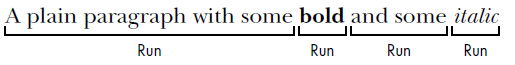

The Run objects identified in a Paragraph object.


A ***style*** is a collection of information like: font, size, color, other style associated information.

A run object is a contiguous run of text with the same style. A new Run object is needed whenever the text style changes.

In [ ]:
import docx
doc = docx.Document('demo.docx')
len(doc.paragraphs)
7

doc.paragraphs[0].text
'Document Title'

doc.paragraphs[1].text
'A plain paragraph with some bold and some italic'

len(doc.paragraphs[1].runs)
4

doc.paragraphs[1].runs[0].text
'A plain paragraph with some '

doc.paragraphs[1].runs[1].text
'bold'

doc.paragraphs[1].runs[2].text
' and some '

doc.paragraphs[1].runs[3].text
'italic'

1. we open a .docx file in Python, call docx.Document(), and pass the filename demo.docx, it return Document object.

Access paragraph attribute - list of Paragraph objects, len returns the number of paragraphs

2. Each paragraph object has string of text - attribute text (without style information)
3. Each Paragraph object run attribute - inturn run has text attribute 



### **Getting the Full Text from a .docx File**

getText() function accepts the file name of .docx and return single string values of its text. 

Store the below code in `readDocx.py`

In [ ]:
import docx
def getText(filename):
  doc = docx.Document(filename)
  fullText = []
  for para in doc.paragraphs:
    fullText.append(para.text)
  return '\n'.join(fullText)

The getText() function opens the Word document, loops over all the Paragraph objects in the paragraphs list, and then appends their text to the list in fullText.

In [ ]:
import readDocx
print(readDocx.getText('demo.docx'))

### **Styling Paragraph and Run Objects**

Style can be applied to all the paragraphs or certain paragrahs.

For Word documents, there are three types of styles: 
1. Paragraph styles can be applied to Paragraph objects, 
2. character styles can be applied to Run objects, and 
3. linked styles can be applied to both kinds of objects

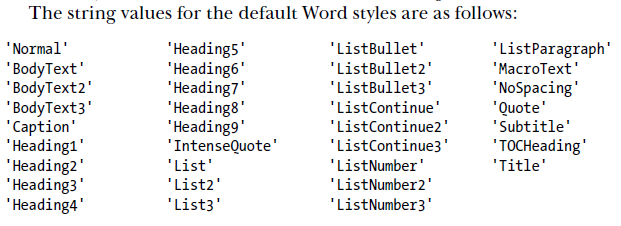

for a Run object, you will need to add 'Char' to the end of its name

Example:

for a Paragraph object, you would use `paragraphObj.style = 'Quote'`

but for a Run object, you would use `runObj.style = 'QuoteChar'`

### **Run Attributes**

Run text attributes can have 3 values: True, False, None

Run Object text attributes are:

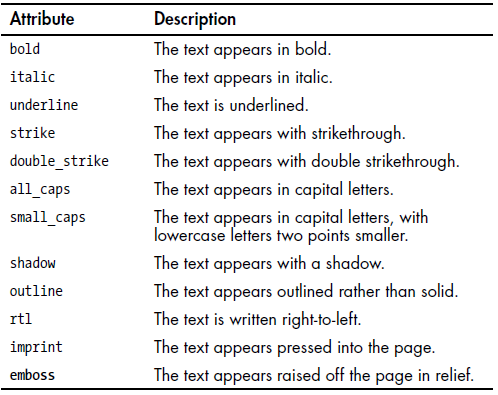

For example, to change the styles of demo.docx, enter the following into
the interactive shell:

In [ ]:
doc = docx.Document('demo.docx')
doc.paragraphs[0].text
'Document Title'

doc.paragraphs[0].style
'Title'

doc.paragraphs[0].style = 'Normal'
doc.paragraphs[1].text
'A plain paragraph with some bold and some italic'

(doc.paragraphs[1].runs[0].text, doc.paragraphs[1].runs[1].text, doc.paragraphs[1].runs[2].text, doc.paragraphs[1].runs[3].text)
('A plain paragraph with some ', 'bold', ' and some ', 'italic')

doc.paragraphs[1].runs[0].style = 'QuoteChar'
doc.paragraphs[1].runs[1].underline = True
doc.paragraphs[1].runs[3].underline = True
doc.save('restyled.docx')

we use the text and style attributes to easily see what’s in the paragraphs in our document.

The words Document Title at the top of restyled.docx will have the Normal style instead of the Title style, the Run object for the text A plain paragraph with some will have the QuoteChar style, and the two Run objects for the words bold and italic will have their underline attributes set to True.

### **Writing Word Documents**

To create your own .docx file, call docx.Document() to return a new, blank Word Document object.

The add_paragraph() document method adds a new paragraph of text to the document and returns a reference to the Paragraph object that was added.

And pass a filename string to the save() document method to save the Document object to a file.


In [ ]:
import docx
doc = docx.Document()
doc.add_paragraph('Hello world!')
<docx.text.Paragraph object at 0x0000000003B56F60>

doc.save('helloworld.docx')

add_run() can used to add text to the paragraph which is already existing

In [ ]:
import docx
doc = docx.Document()
doc.add_paragraph('Hello world!')
<docx.text.Paragraph object at 0x000000000366AD30>

paraObj1 = doc.add_paragraph('This is a second paragraph.')
paraObj2 = doc.add_paragraph('This is a yet another paragraph.')
paraObj1.add_run(' This text is being added to the second paragraph.')
<docx.text.Run object at 0x0000000003A2C860>

doc.save('multipleParagraphs.docx')

Note that the text This text is being added to the second paragraph. was added to the Paragraph object in `paraObj1`, which was the second paragraph added to doc.

The `add_paragraph()` and `add_run()` functions return paragraph and Run objects, respectively

### **Adding Headings**

add_heading() adds a paragraph with one of the heading styles

In [ ]:
>>> doc = docx.Document()
>>> doc.add_heading('Header 0', 0)
<docx.text.Paragraph object at 0x00000000036CB3C8>

>>> doc.add_heading('Header 1', 1)
<docx.text.Paragraph object at 0x00000000036CB630>

>>> doc.add_heading('Header 2', 2)
<docx.text.Paragraph object at 0x00000000036CB828>

>>> doc.add_heading('Header 3', 3)
<docx.text.Paragraph object at 0x00000000036CB2E8>

>>> doc.add_heading('Header 4', 4)
<docx.text.Paragraph object at 0x00000000036CB3C8>

>>> doc.save('headings.docx')

Heading 0, becomes the title and rest from 1 to 4 of various styles. The content of heading.docx will be

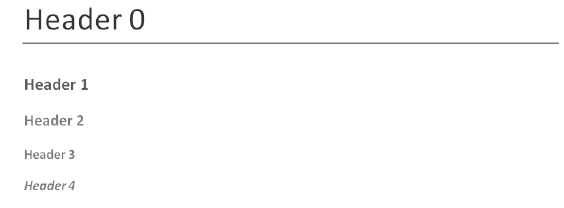

### **Adding Line and Page Breaks**

add a line break (rather than starting a whole new paragraph), we can call the add_break() method on the Run object.

To add page break, we need to pass `docx.text.WD_BREAK.PAGE` to add_break() method.

In [ ]:
>>> doc = docx.Document()
>>> doc.add_paragraph('This is on the first page!')
<docx.text.Paragraph object at 0x0000000003785518>

>>> doc.paragraphs[0].runs[0].add_break(docx.text.WD_BREAK.PAGE)
>>> doc.add_paragraph('This is on the second page!')
<docx.text.Paragraph object at 0x00000000037855F8>

>>> doc.save('twoPage.docx')

This creates a two-page Word document with This is on the first page! on the first page and This is on the second page! on the second

### **Adding Pictures**

add_picture() method will let us add an image at the end of the document.

Adding `zophie.png` picture with width = 1 inch and height = 4 Cms

In [ ]:
>>> doc.add_picture('zophie.png', width=docx.shared.Inches(1), height=docx.shared.Cm(4))
<docx.shape.InlineShape object at 0x00000000036C7D30>